
# Differentiate and integrate frequency series to convert units: displacement <-> velocity <-> acceleration; calculate RMS of the spectra


Authors: Artem Basalaev <artemDOTbasalaev@pmDOTme>, Saurav Bania <saurav.bania@studiumDOTuni-hamburg.de>, Shreevathsa Chalathadka Subrahmanya <schalath@physnetDOTuni-hamburg.de>

If not done already, install spicypy (uncomment the line below):

In [1]:
#pip install spicypy

In [2]:
from spicypy.signal import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Calculate speatra and convert units


Create time series: simple random noise

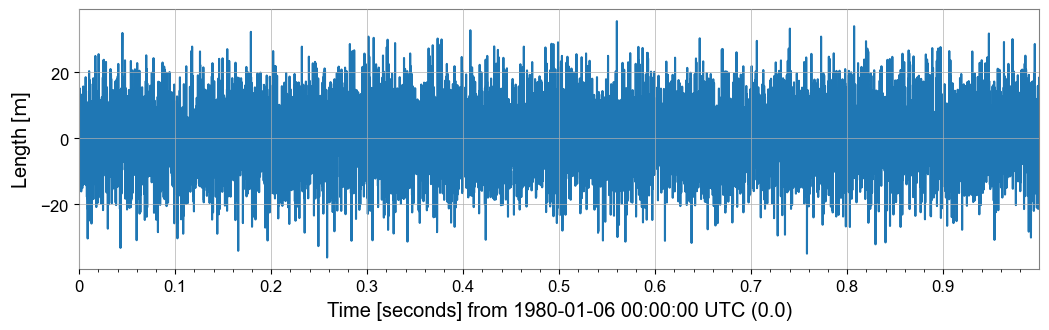

In [3]:
n_samples = 10000
total_time = 1 # in seconds
sampling_frequency = n_samples/total_time
noise_scale = 10

t = np.linspace(0, 1, n_samples)
s1 = np.random.normal(0, scale=noise_scale, size=n_samples)
displacement = TimeSeries(s1, sample_rate=sampling_frequency, name = 'Signal 1', unit='meter')
_ = displacement.plot()

Plot ASD of displacement, velocity and acceleration

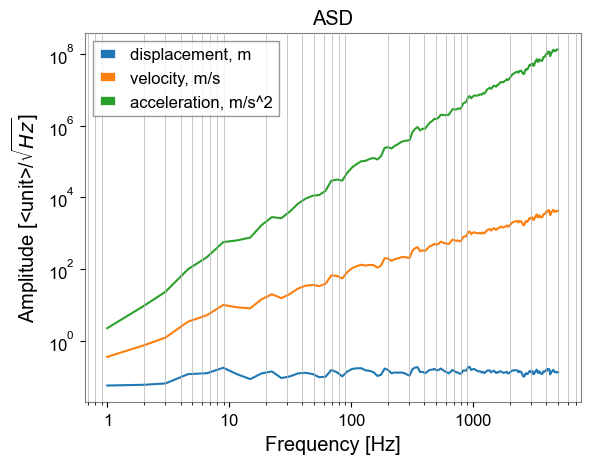

In [4]:
displacement_asd = displacement.asd(method="lpsd")
plt.loglog(displacement_asd, label='displacement, m')
plt.loglog(displacement_asd.to_velocity(), label='velocity, m/s')
plt.loglog(displacement_asd.to_acceleration(), label='acceleration, m/s^2')
plt.grid(which='both')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [<unit>/$\sqrt{Hz}$]')
plt.title("ASD")
plt.show()

Same effect can be achieved by using `FrequencySeries.times_iomega(omega_exponent)` for time series of any units. Argument `omega_exponent`>0 means differentiation, and `omega_exponent`<0 integration `omega_exponent` times.

In [5]:
power = TimeSeries(s1, sample_rate=sampling_frequency, name = 'Signal 1', unit='W')
power_asd = power.asd(method="lpsd")
plt.loglog(power_asd, label='power, W=J/s')
plt.loglog(power_asd.times_iomega(-1), label='work, J')
plt.grid(which='both')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [<unit>$\sqrt{Hz}$]')
plt.title("ASD")
plt.show()

Now let's do this conversion on real seismic data:

In [6]:
df_seismic = pd.read_csv('seismic_data/trillium_compact_recording.csv')
input_seismic = TimeSeries(df_seismic['east'], sample_rate=200, unit="m/s")
seismic_asd = input_seismic.asd(method="lpsd")

plt.loglog(seismic_asd.to_displacement(), label='displacement, m')
plt.loglog(seismic_asd, label='velocity, m/s')
plt.loglog(seismic_asd.to_acceleration(), label='acceleration, m/s^2')
plt.grid(which='both')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [<unit>$\sqrt{Hz}$]')
plt.title("ASD")
plt.show()

## Calculate RMS

Let's now try to calculate and plot the RMS of the spectra for the seismic data considered above.

In [7]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.loglog(seismic_asd.to_displacement(), label='displacement, m')
ax2.loglog(seismic_asd.to_displacement().rms(), ls='-.')
ax1.loglog(seismic_asd, label='velocity, m/s')
ax2.loglog(seismic_asd.rms(), ls='-.')
ax1.loglog(seismic_asd.to_acceleration(), label='acceleration, m/s^2')
ax2.loglog(seismic_asd.to_acceleration().rms(), ls='-.')
ax1.grid(which='both')
ax1.legend()
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('Amplitude [<unit>$\sqrt{Hz}$]')
ax2.set_ylabel('Amplitude RMS [<unit>]')
plt.title("ASD and RMS")
plt.show()

Now assume that you want the RMS calculated starting from a specific frequency, say 1 Hz. This use case is shown below.

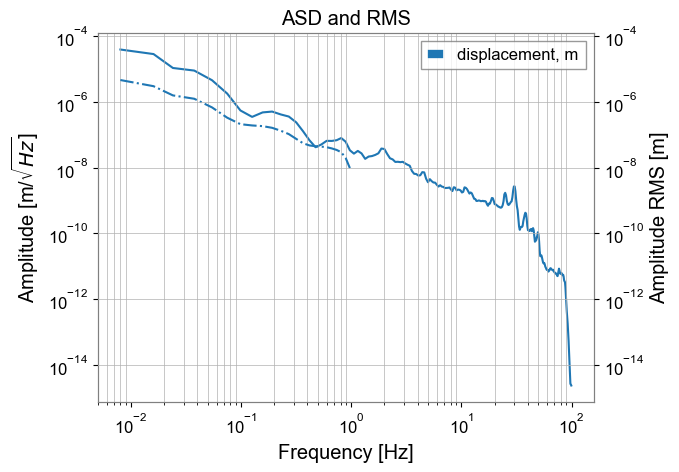

In [8]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.loglog(seismic_asd.to_displacement(), label='displacement, m')
ax2.loglog(seismic_asd.to_displacement().rms(start_frequency=1), ls='-.')
ax1.grid(which='both')
ax1.legend()
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('Amplitude [m/$\sqrt{Hz}$]')
ax2.set_ylabel('Amplitude RMS [m]')
plt.title("ASD and RMS")
ymin, ymax = ax1.get_ylim()
ax2.set_ylim(ymin,ymax)
plt.show()

As another example, let's now generate some pink noise. Then we calculate the PSD and see how it's RMS look like.

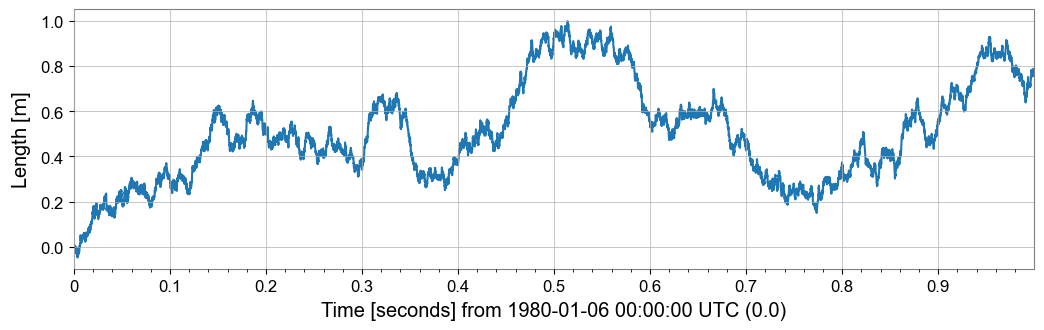

In [9]:
def generate_pink_noise(num_samples):
    np.random.seed(1)
    pink_noise = np.random.randn(num_samples)
    pink_noise = np.cumsum(pink_noise)
    pink_noise /= np.max(np.abs(pink_noise))
    return pink_noise

pink_noise = generate_pink_noise(n_samples)
pink_ts = TimeSeries(pink_noise, sample_rate=sampling_frequency, name='pink noise', unit='m')
_ = pink_ts.plot()

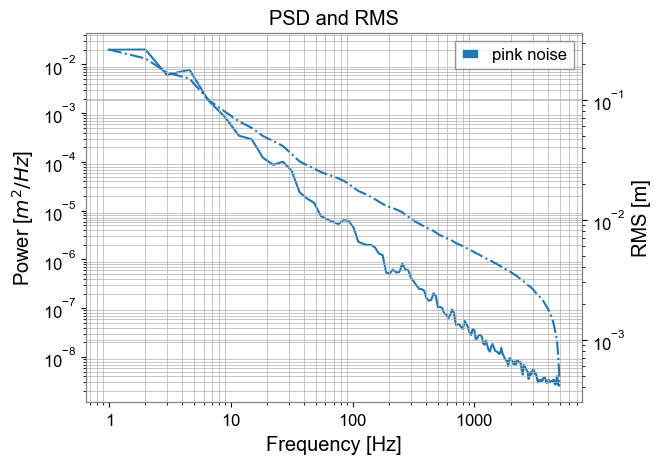

In [10]:
pink_psd = pink_ts.psd(method='lpsd')

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.loglog(pink_psd, label='pink noise')
ax2.loglog(pink_psd.rms(), ls='-.')
ax1.grid(which='both')
ax1.legend()
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel(r'Power [$m^{2}/Hz$]')
ax2.set_ylabel('RMS [m]')
plt.title("PSD and RMS")
plt.show()